In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os

os.environ['SNORKELDB'] = 'postgres://localhost:5432/babble_test_spouse'

from snorkel import SnorkelSession
session = SnorkelSession()

In [2]:
from snorkel.models import candidate_subclass

Spouse = candidate_subclass('Spouse', ['person1', 'person2'])

In [8]:
candidates = session.query(Spouse).filter(Spouse.split == 1).all()[100:600]
print(len(candidates))

500


In [9]:
from snorkel.annotations import load_gold_labels

L_gold_dev = load_gold_labels(session, annotator_name='gold', split=1)

In [10]:
labels = [L_gold_dev[L_gold_dev.get_row_index(c),0] for c in candidates]
assert(len(labels) == len(candidates))

In [11]:
import os
import sys
sys.path.append(os.environ['SNORKELHOME'] + '/tutorials/babble/data/')
from mturk_processing import MTurkHelper

In [12]:
helper = MTurkHelper(candidates, labels, pct_positive=0.5, num_hits=13)

Found 26 positive, 445 negative, 29 unknown candidates.
Using 26 positive, 26 negative candidates.


In [13]:
input_csv_path= os.environ['SNORKELHOME'] + '/tutorials/babble/data/mturk_spouse_02_in.csv'
helper.preprocess(input_csv_path)

Wrote 13 HITs with 4 candidates per HIT


Num HITs unique: 25
Num HITs total: 75


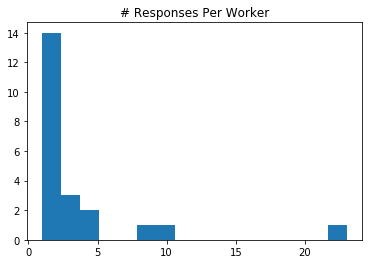

Median # seconds/HIT: 455 (113.0 s/explanation)


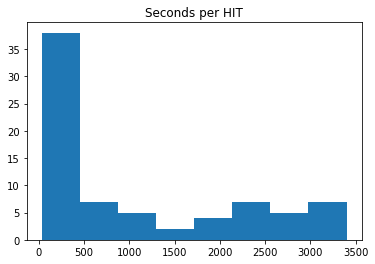

> /Users/bradenjh/repos/snorkel/tutorials/babble/data/mturk_processing.py(210)postprocess()
-> raise Exception("Could not find candidate to link.")
(Pdb) q


BdbQuit: 

In [14]:
output_csv_path= os.environ['SNORKELHOME'] + '/tutorials/babble/data/mturk_spouse_01_out.csv'
explanations = helper.postprocess(output_csv_path, verbose=True)

In [ ]:
exp_iterator = iter(explanations)

In [ ]:
exp = exp_iterator.next()
from snorkel.viewer import SentenceNgramViewer
print(exp.condition)
sv = SentenceNgramViewer([exp.candidate], session, n_per_page=3, height=300)
sv